# BREAST CANCER DATASET

Breast cancer dataset from kaggle. The target variable to predict is diagnosis (it can have two values, B for benign and M for malign).

In [1]:
# import libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Datasets/breast_cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.shape

(569, 33)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

### Exploratory Data Analysis

In [5]:
df.isnull().sum().sort_values(ascending=False)

Unnamed: 32                569
compactness_se               0
fractal_dimension_worst      0
symmetry_worst               0
concave points_worst         0
concavity_worst              0
compactness_worst            0
smoothness_worst             0
area_worst                   0
perimeter_worst              0
texture_worst                0
radius_worst                 0
fractal_dimension_se         0
symmetry_se                  0
concave points_se            0
concavity_se                 0
id                           0
diagnosis                    0
area_se                      0
perimeter_se                 0
texture_se                   0
radius_se                    0
fractal_dimension_mean       0
symmetry_mean                0
concave points_mean          0
concavity_mean               0
compactness_mean             0
smoothness_mean              0
area_mean                    0
perimeter_mean               0
texture_mean                 0
radius_mean                  0
smoothne

In [6]:
df.drop('Unnamed: 32', axis=1, inplace=True) # Delete this column 

From the next two lines of code we can see that the dataset is a bit unbalanced (there are more benign cases than malign cases).

In [7]:
# checking the unique values in the target column (diagnosis)
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

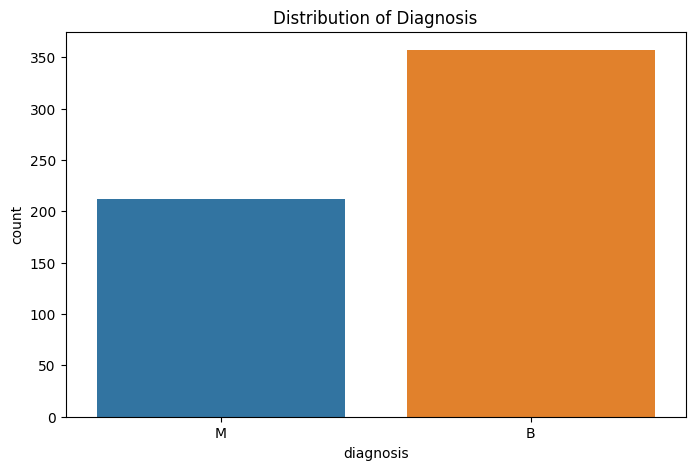

In [8]:
plt.figure(figsize=(8, 5))
sns.countplot(x='diagnosis', data=df)
plt.title('Distribution of Diagnosis')
plt.show()

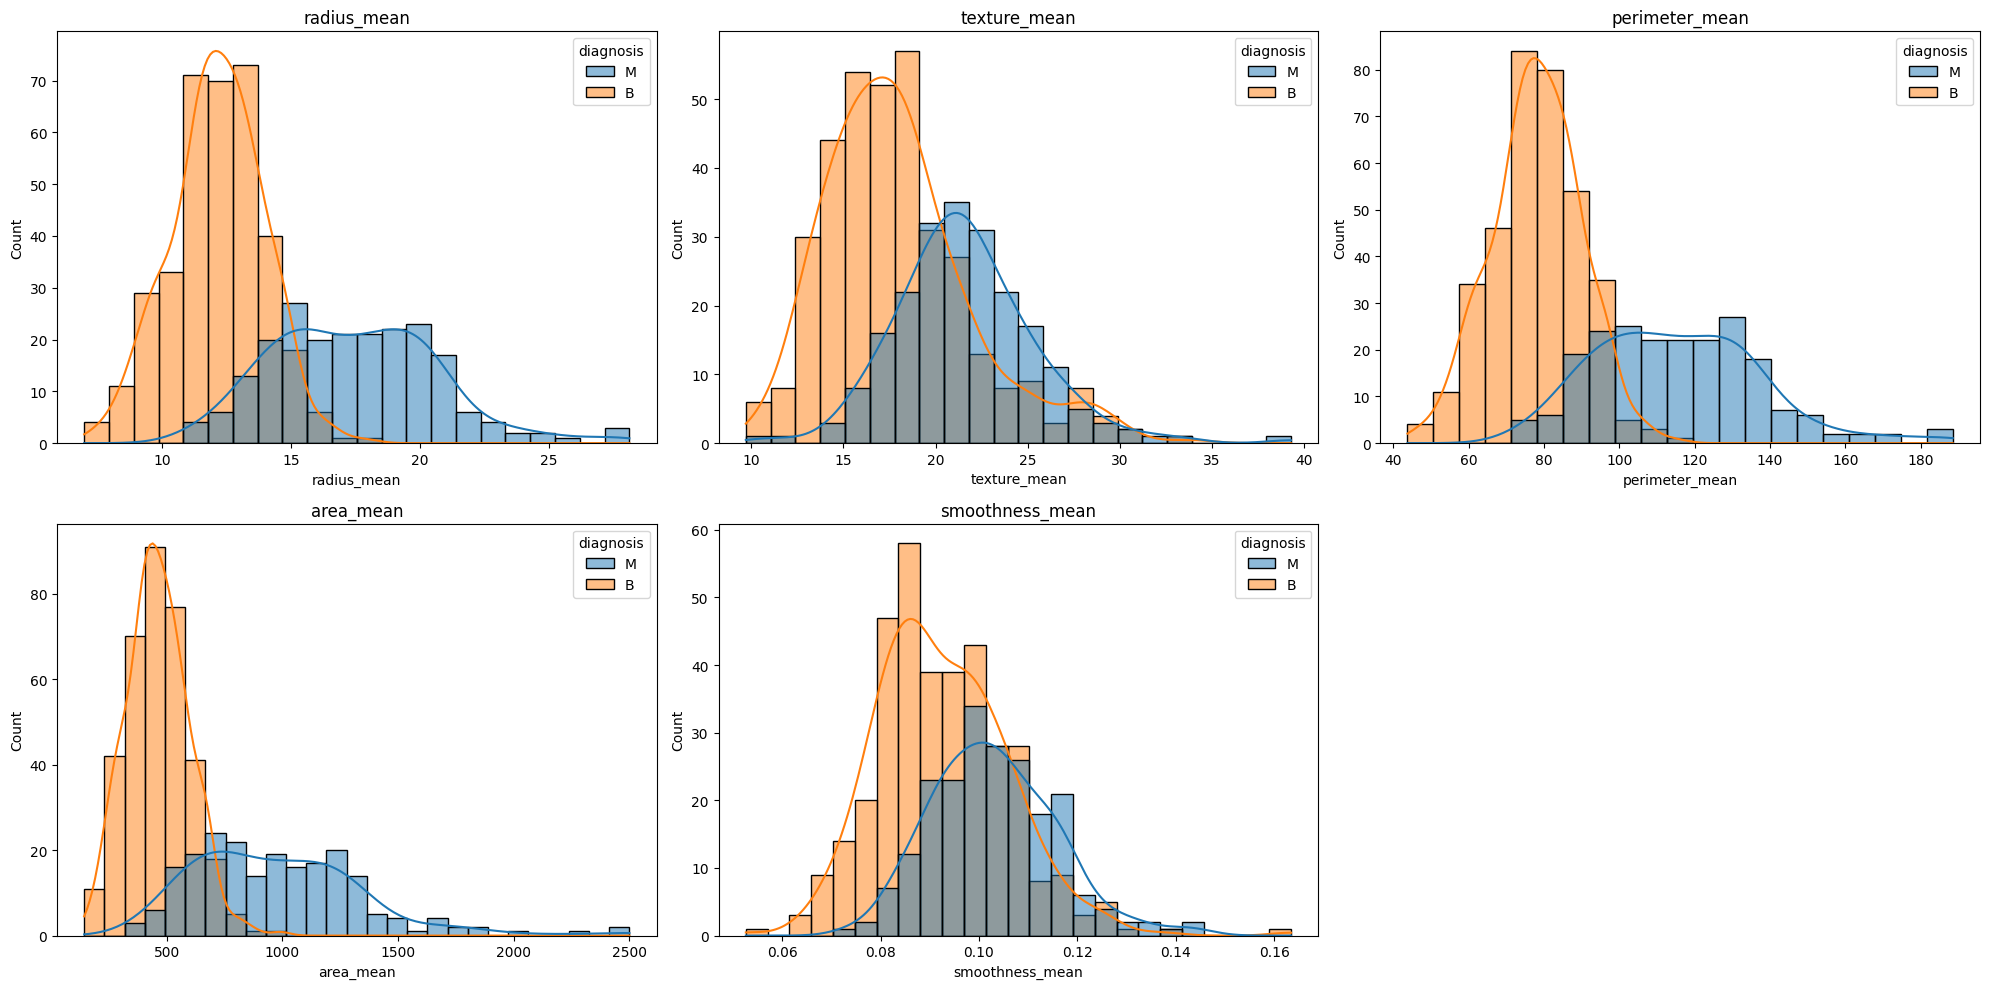

In [9]:


# checking distribution using histogram
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the visualization
plt.figure(figsize=(20, 10))

# Selecting a subset of features for visualization
features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']
n_features = len(features)

# Creating subplots for each feature
for i in range(n_features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df, x=features[i], hue='diagnosis', kde=True)
    plt.title(features[i])

plt.tight_layout()
plt.show()



We can observe from the previous images that features related to the size and texture of the tumor (such as radius, perimeter, and area) are significant in differentiating between malignant and benign tumors. This kind of analysis is crucial for understanding which features are most important in predicting the type of breast cancer and can guide further statistical analysis and model development.

In [10]:
# Let's encode the variable diagnosis

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


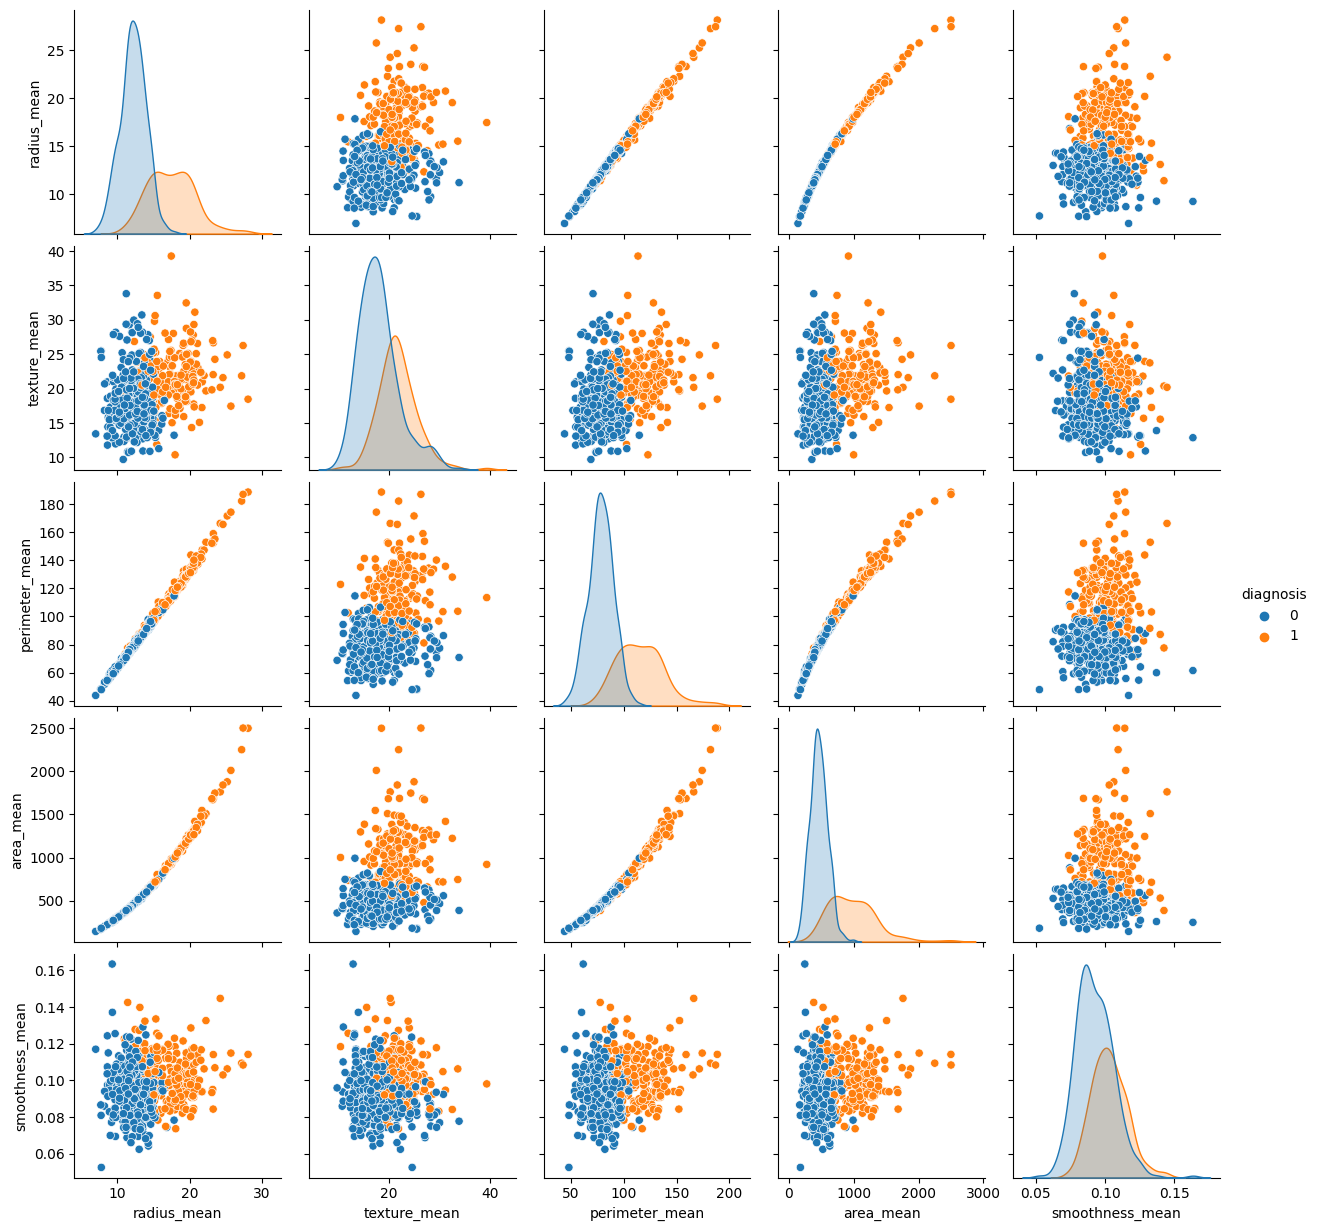

In [11]:
sns.pairplot(df.iloc[:, 1:7], hue='diagnosis')

We can see many positive relationship among the plots. These two variables have collinearity, but since we are not going to apply any linear regression or similar models, this should not be concerning.

<Axes: >

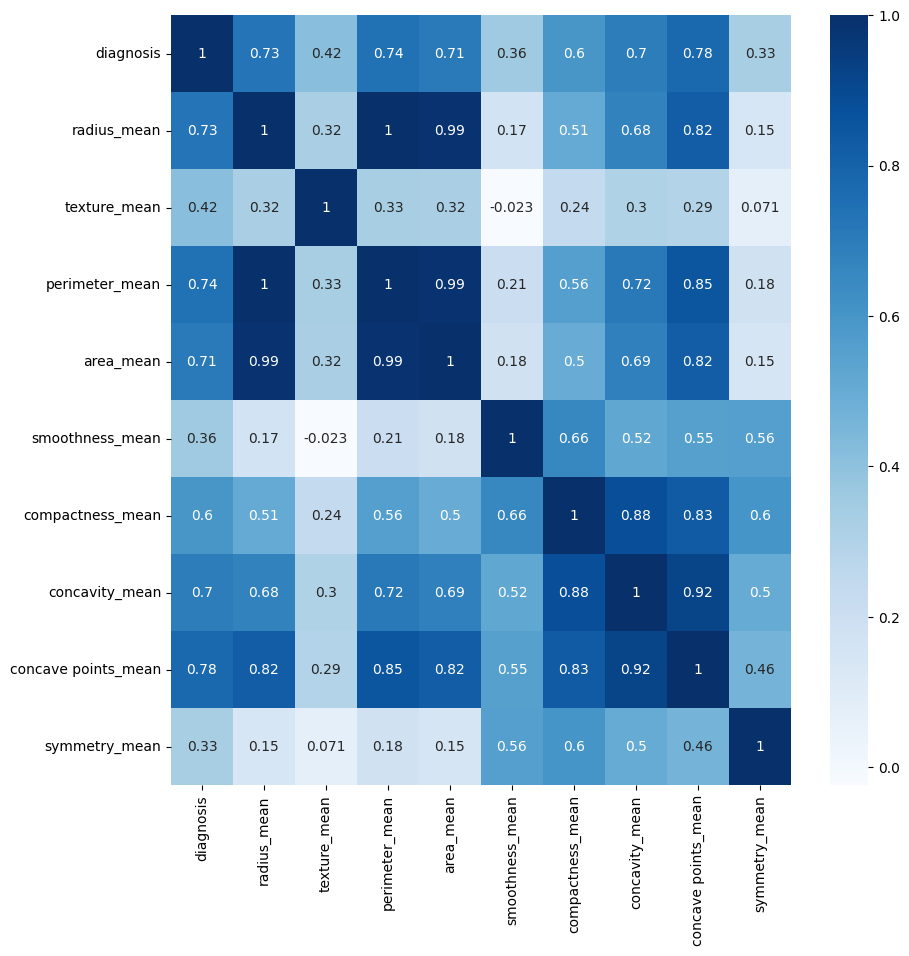

In [12]:
# let's draw a heatmap for understanding correlation between variables
# correlation between columns 
df.iloc[:,1:11].corr()
# heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.iloc[:,1:11].corr(), annot=True, cmap='Blues')

There are strong positive correlations between features that describe the size and shape of the tumor

In [13]:
# DATASET SPLITTING

X = df.iloc[:, 2:31].values
y = df.iloc[:, 1].values # The target variable is in the second column

In [14]:
# split the dataset into 80% training and 20% testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.20, random_state=42)

In [15]:
# feature scaling using standard scaler

# we only scale the X and not the y because it is a classification problem
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

### ML modelling and evaluation

In [16]:
def models(X_train, y_train):
    # Logistic Regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state=0)
    log.fit(X_train, y_train)

    # Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
    tree.fit(X_train, y_train)

    # Random Forest Classifier
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
    forest.fit(X_train, y_train)

    # XGBoost Classifier
    from xgboost import XGBClassifier
    xgb = XGBClassifier()
    xgb.fit(X_train, y_train)

    return log, tree, forest, xgb



In [17]:
model= models(X_train, y_train)

In [18]:
# evaluate the model on classification report and accuracy score
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score

# Initialize an empty DataFrame
model_performance = pd.DataFrame(columns=['Model', 'Precision', 'Recall', 'F1-Score', 'Accuracy'])

# List of model names for reference
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost']

for i, m in enumerate(model):
    # Predict using the model
    predictions = m.predict(X_test)

    # Get the classification report
    cr = classification_report(y_test, predictions, output_dict=True)

    # Extract performance metrics
    precision = cr['weighted avg']['precision']
    recall = cr['weighted avg']['recall']
    f1_score = cr['weighted avg']['f1-score']
    accuracy = accuracy_score(y_test, predictions)

    # Create a new DataFrame for the current model's performance
    current_model_performance = pd.DataFrame({'Model': [model_names[i]],
                                              'Precision': [precision],
                                              'Recall': [recall],
                                              'F1-Score': [f1_score],
                                              'Accuracy': [accuracy]})

    # Concatenate with the main DataFrame
    model_performance = pd.concat([model_performance, current_model_performance], ignore_index=True)

# Print the DataFrame
print(model_performance)

                 Model  Precision    Recall  F1-Score  Accuracy
0  Logistic Regression   0.982937  0.982456  0.982369  0.982456
1        Decision Tree   0.948808  0.947368  0.946806  0.947368
2        Random Forest   0.956905  0.956140  0.955801  0.956140
3              XGBoost   0.966784  0.964912  0.964537  0.964912


In [21]:
from sklearn.model_selection import cross_val_score

model_tuple = models(X_train, y_train)  # This will store all models in a tuple

model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost']

# Iterate over each model and its name
for model, name in zip(model_tuple, model_names):
    # Perform 5-fold cross-validation and calculate the accuracy
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    
    # Print the accuracy for each fold for the current model
    print(f"Accuracy scores for each fold ({name}):", scores)
    
    # Print the mean accuracy across all folds
    print(f"Mean accuracy ({name}):", scores.mean(), '\n')


Accuracy scores for each fold (Logistic Regression): [0.92982456 0.92982456 0.95614035 0.9122807  0.9380531 ]
Mean accuracy (Logistic Regression): 0.933224654556746 

Accuracy scores for each fold (Decision Tree): [0.93859649 0.92982456 0.92982456 0.94736842 0.94690265]
Mean accuracy (Decision Tree): 0.9385033379909953 

Accuracy scores for each fold (Random Forest): [0.93859649 0.93859649 0.97368421 0.97368421 0.95575221]
Mean accuracy (Random Forest): 0.9560627231796305 

Accuracy scores for each fold (XGBoost): [0.95614035 0.95614035 0.99122807 0.98245614 0.98230088]
Mean accuracy (XGBoost): 0.9736531594472908 

